<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/MachineLearning/Ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importing dependencies

import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# reading the csv file !
df = pd.read_csv('o3andweatherdata.csv')
df.head()

,date,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,Ozone(ppm)
0,1/1/16,7,59,22,58,70,0.0,1031,10,8,6,8.7,0.031542
1,1/2/16,6,123,9,90,68,0.0,1030,10,8,6,3.8,0.025435
2,1/3/16,9,230,10,36,74,0.0,1025,9,15,5,8.7,0.027647
3,1/4/16,8,129,13,57,72,0.0,1024,9,11,5,5.4,0.028542
4,1/5/16,8,78,12,59,82,0.0,1025,9,12,4,8.7,0.027706


In [10]:
df['Ozone(ppm)'] = df['Ozone(ppm)'] * 100

In [12]:
# checking for null values (missing values)
df.isnull().sum()

date             0
avgtempC         0
winddirDegree    0
windspeedKmph    0
cloudcover       0
humidity         0
precipInches     0
pressure         0
visibility       0
maxtempC         0
mintempC         0
sunHour          0
Ozone(ppm)       0
dtype: int64

In [13]:
# Data information
df.describe()

,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,Ozone(ppm)
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,20.864865,155.495982,13.573411,40.108839,68.869248,0.068590,1016.269540,9.479182,25.870709,16.423667,10.127684,0.031748
std,7.704047,63.281293,5.075517,28.777158,13.898378,0.199505,5.626115,1.518804,8.196246,7.424290,2.886602,0.009859
min,-3.000000,0.000000,3.000000,0.000000,25.000000,0.000000,1002.000000,5.000000,0.000000,-7.000000,3.800000,0.003238
25%,15.000000,123.000000,10.000000,15.000000,59.000000,0.000000,1013.000000,9.000000,21.000000,11.000000,8.700000,0.024667
50%,22.000000,166.000000,13.000000,35.000000,70.000000,0.000000,1015.000000,10.000000,27.000000,18.000000,10.900000,0.030824
75%,27.000000,186.000000,17.000000,61.000000,80.000000,0.100000,1019.000000,10.000000,33.000000,23.000000,12.200000,0.038647
max,35.000000,346.000000,40.000000,100.000000,95.000000,3.400000,1040.000000,20.000000,42.000000,28.000000,14.100000,0.065333


<ipython-input-18-f4736fe5bb4b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



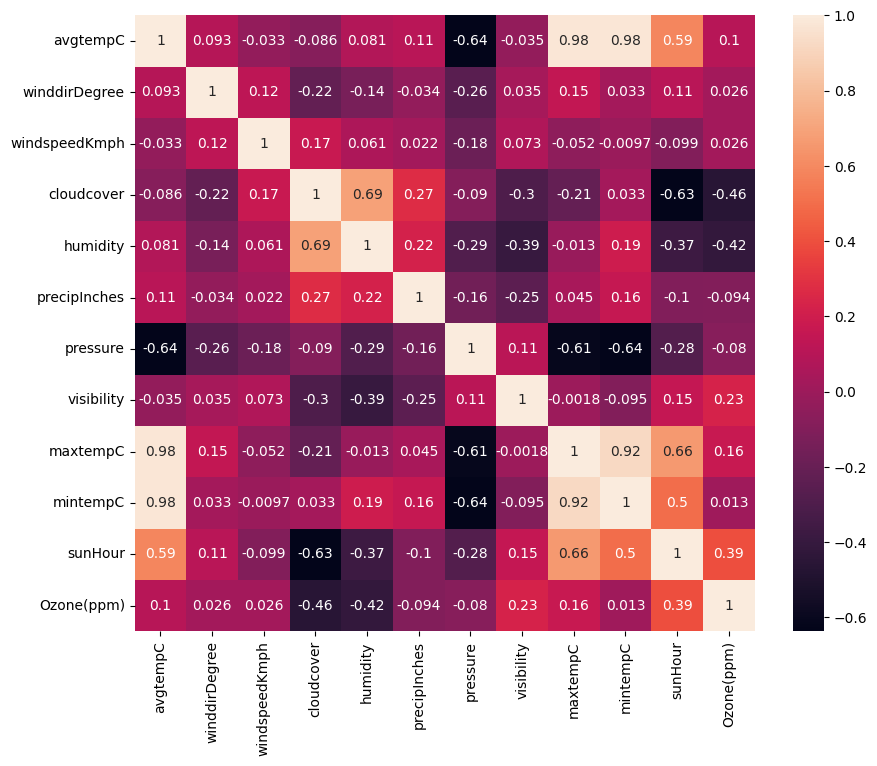

In [18]:
# correlation visualization
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))


g = sns.heatmap(df[top_corr_features].corr(),annot=True)

In [19]:
# Define X and y matrix :)
X = df[['maxtempC', 'humidity', 'winddirDegree', 'windspeedKmph', 'cloudcover']] # Features
y = df['Ozone(ppm)']  # Target

In [20]:
# Feature selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
X.head()

,maxtempC,humidity,winddirDegree,windspeedKmph,cloudcover
0,8,70,59,22,58
1,8,68,123,9,90
2,15,74,230,10,36
3,11,72,129,13,57
4,12,82,78,12,59


In [22]:
y.head()

0    0.031542
1    0.025435
2    0.027647
3    0.028542
4    0.027706
Name: Ozone(ppm), dtype: float64

<ipython-input-30-818b6c79981d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

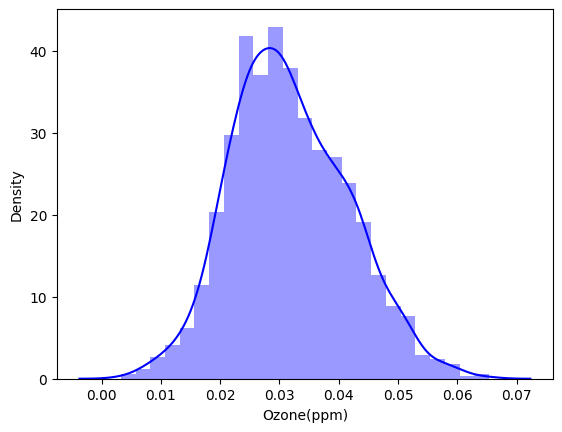

In [30]:
sns.distplot(y,color='blue')   # Distribution of O3

# 1. Linear Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [34]:
# selecting all features to begin with
X = df[['avgtempC', 'winddirDegree', 'windspeedKmph', 'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility', 'maxtempC', 'mintempC', 'sunHour']]
y = df['Ozone(ppm)']  ## dependent features

In [35]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [36]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
humidity,0.002168
maxtempC,0.001191
date,0.001080
mintempC,0.000600
precipInches,0.000403
pressure,0.000284
winddirDegree,0.000151
cloudcover,0.000136
visibility,0.000131


In [37]:
scaler = StandardScaler()
stand_coef_linear_reg = make_pipeline(scaler, model)
stand_coef_linear_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [38]:
# standardizing the variables so that the values are converted to lie between -3 and +3
result = pd.DataFrame(list(zip(stand_coef_linear_reg.steps[1][1].coef_, df.columns)),
                     columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
maxtempC,0.008836
date,0.008318
precipInches,0.002266
windspeedKmph,0.002034
cloudcover,0.001887
mintempC,0.001730
avgtempC,0.001632
visibility,0.001073
winddirDegree,0.000766


In [39]:
# selecting features
X = df[['maxtempC', 'cloudcover', 'precipInches', 'windspeedKmph', 'avgtempC']] #independent features
y = df['Ozone(ppm)']  ## dependent features

In [40]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [43]:
# coefficient for X and and the y-intercept
print('coefficients: ', lr_model.coef_)
print('intercept: ', lr_model.intercept_)

coefficients:  [ 0.00041824 -0.00015178  0.0020048   0.00027127 -0.00034876]
intercept:  0.030250232924704756


In [64]:
y_train_predictions = lr_model.predict(X_train)

In [65]:
y_test_predictions = lr_model.predict(X_test)

<ipython-input-66-562ae174378b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

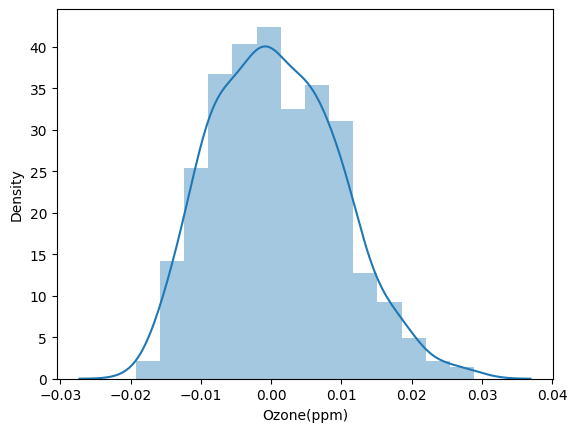

In [66]:
sns.distplot(y_test - y_test_predictions)

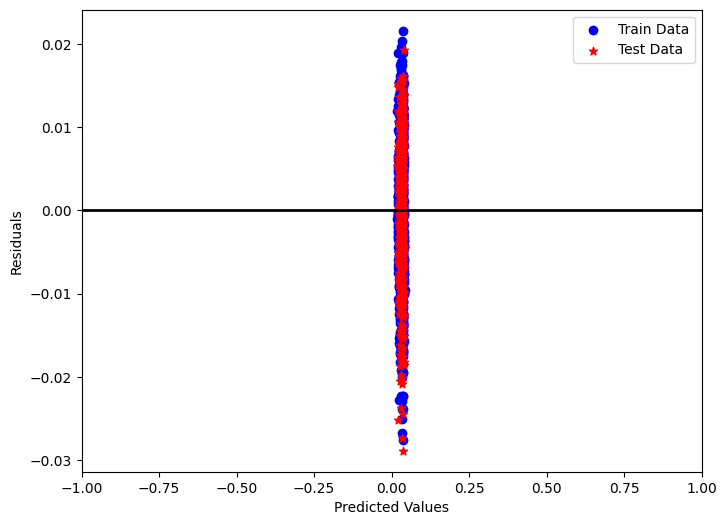

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions - y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions - y_test, c="red", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-1, 1])
plt.show()

In [69]:
print('MSE for training data:', metrics.mean_squared_error(y_train, y_train_predictions))
print('MSE for training data: ', metrics.mean_squared_error(y_test, y_test_predictions))

MSE for training data: 7.320543173486247e-05
MSE for training data:  7.914553704733571e-05


In [70]:
from sklearn.metrics import r2_score
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, y_test_predictions))

Coefficient of determination R^2 <-- on train set: 0.23707531405565618
Coefficient of determination R^2 <-- on test set: 0.20631309269789744


## Polynomial Regression

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [73]:
polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression()

In [74]:
y_pred = polyreg.predict(poly.fit_transform(X_test))

In [75]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_pred))

R-Square Error associated with Polynomial Regression is: 0.27789628259884047
MSE for testing data: 7.200734444752368e-05


## Lasso Regression

In [76]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [77]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-7.760851975870597e-05


In [78]:
prediction_lasso = lasso_regressor.predict(X_test)

<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

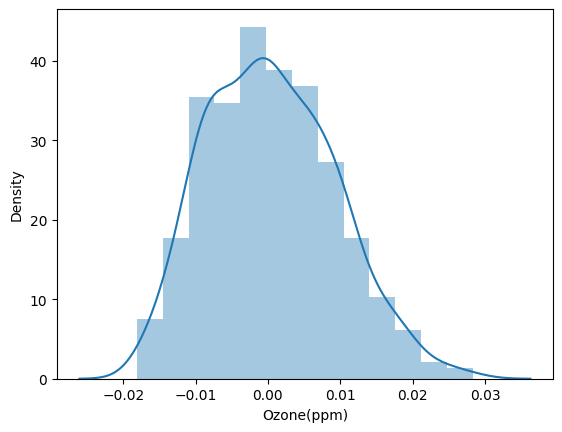

In [79]:
sns.distplot(y_test - prediction_lasso)

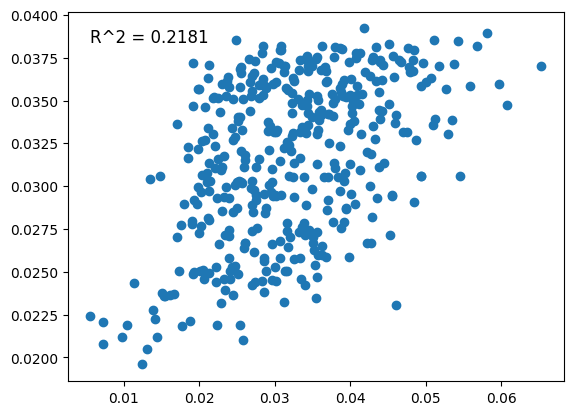

MAE: 0.007187745195746475
MSE: 7.797056179450957e-05
RMSE: 0.00883009409884796


In [80]:
r_squared = r2_score(y_test, prediction_lasso)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(prediction_lasso), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, prediction_lasso)
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

## Ridge Regression

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [82]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [83]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-7.818235901736585e-05


In [100]:
from sklearn.model_selection import cross_val_score
# Linear Regression model
lm1 = LinearRegression()
mse = cross_val_score(lm1, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-7.842344857940805e-05


# Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor model

In [104]:
rf = RandomForestRegressor()

In [105]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
print("Coefficient of determination R^2  - train set: {}".format(rf.score(X_train, y_train)))
print("Coefficient of determination R^2  - test set: {}".format(rf.score(X_test, y_test)))

Coefficient of determination R^2  - train set: 0.9024685413755698
Coefficient of determination R^2  - test set: 0.38373177393726343


In [107]:
score = cross_val_score(rf, X, y, cv=5)

In [108]:
score.mean()

0.2770574723560406

In [109]:
RandomForestRegressor()

RandomForestRegressor()

In [111]:
from sklearn.model_selection import RandomizedSearchCV # to determine the hyperparameters

In [112]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [113]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [114]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [115]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()

In [116]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [117]:
rf1_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf1_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [ ]:
rf1_random.best_score_

-0.6079948691125616

In [ ]:
prediction_rf1 = rf1_random.predict(X_test)

<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

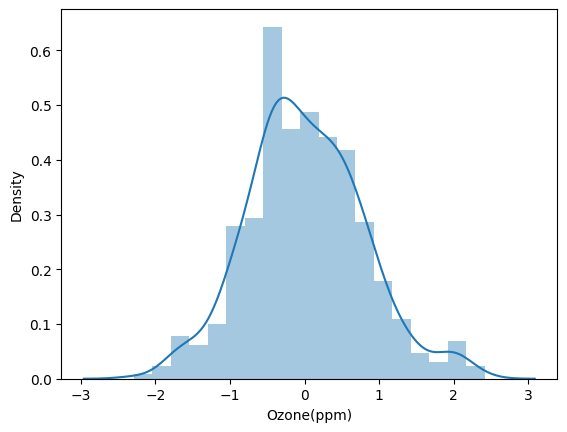

In [ ]:
sns.distplot(y_test - prediction_rf1)

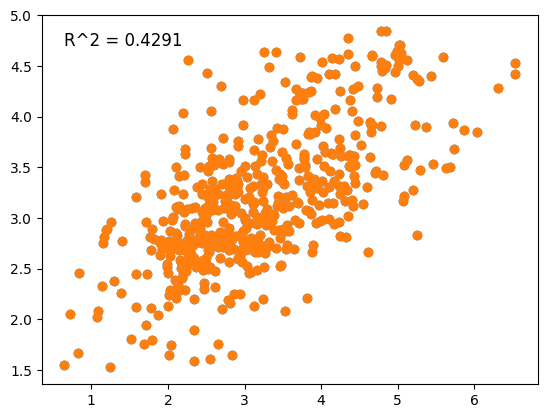

In [ ]:
r_squared = r2_score(y_test, prediction_rf1)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(prediction_rf1), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, prediction_rf1)

plt.scatter(y_test, prediction_rf1)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf1))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf1)))

MAE: 0.6164818942787551
MSE: 0.607780564942871
RMSE: 0.7796028251249933
